In [ ]:
pip install opencv-python


#non ai

In [ ]:
pip install opencv-python numpy

Number of items: 48


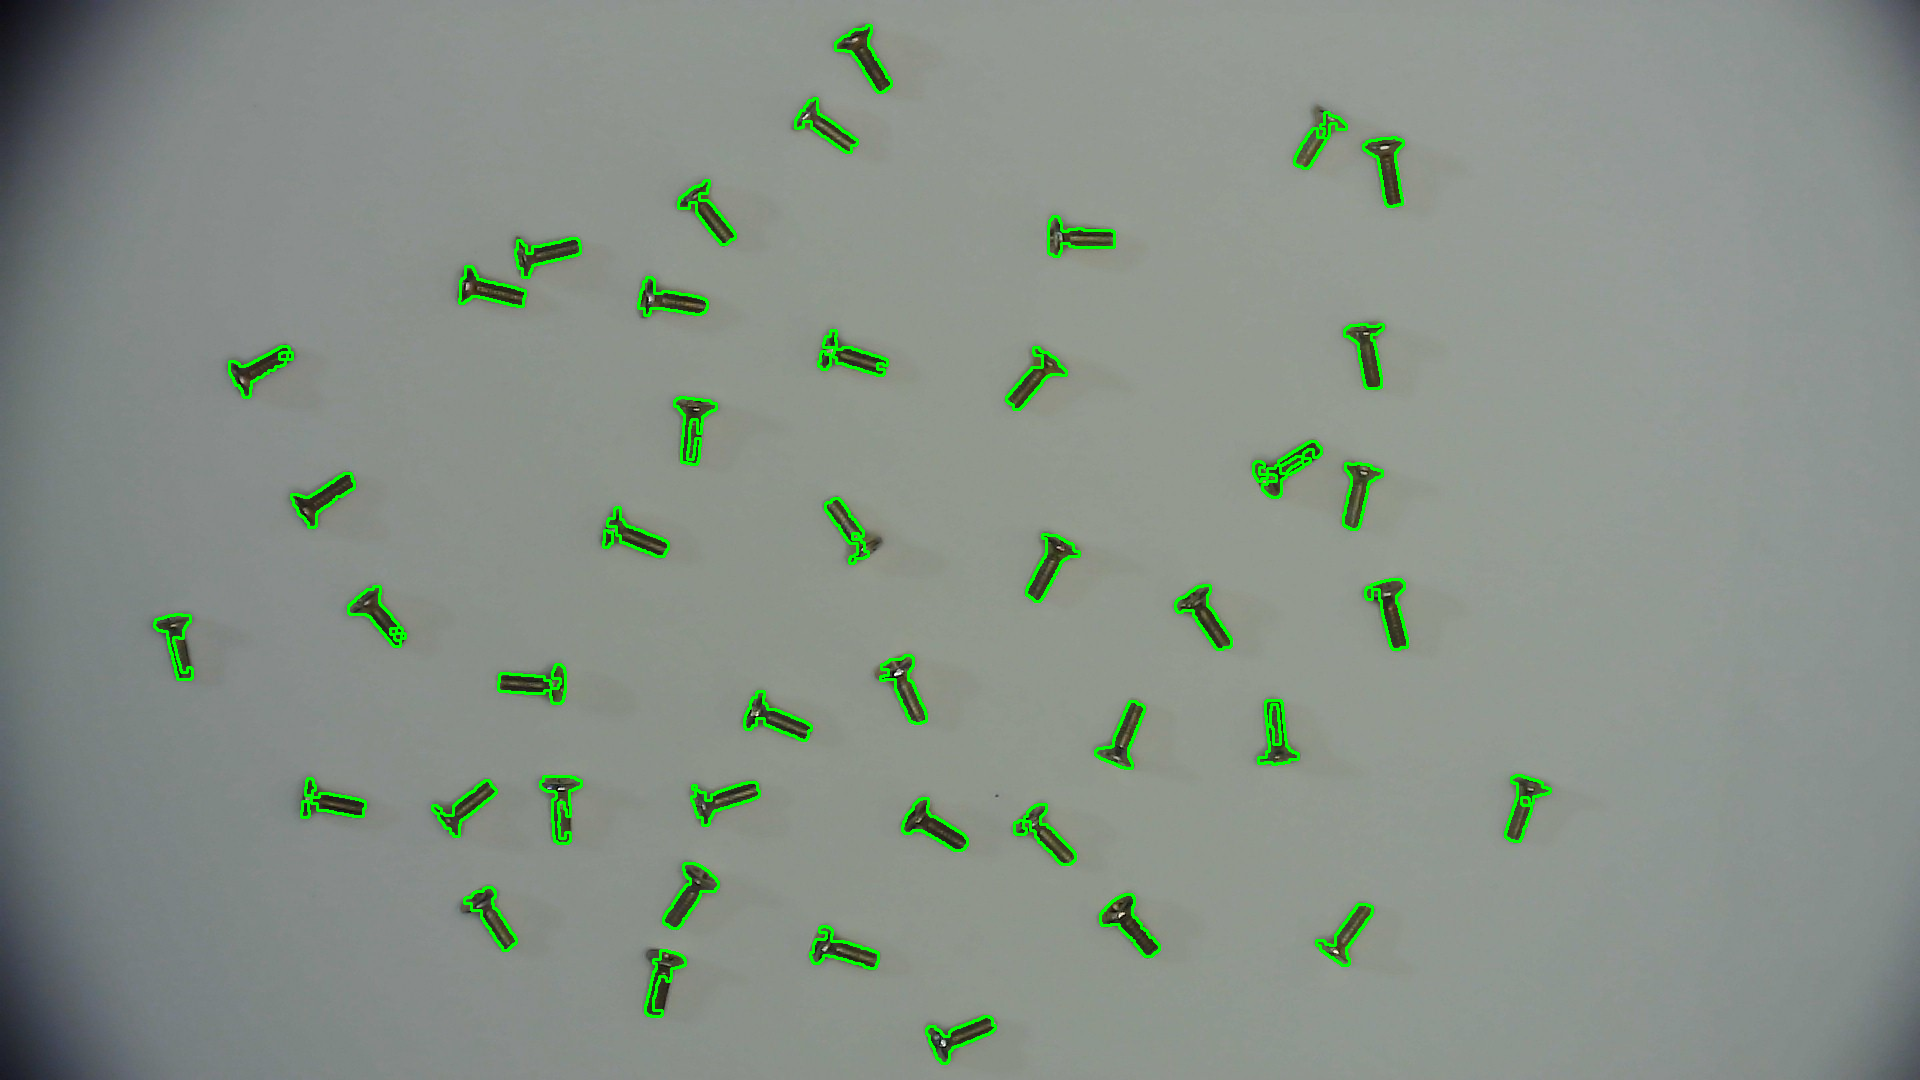

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import the Colab patch
def preprocess_image(image_path):
    """Preprocess the image for better contour detection."""
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return image, thresh

def apply_morphological_operations(thresh):
    """Apply morphological operations to remove noise and fill gaps."""
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=2)
    return opening

def filter_contours(contours, min_area=100):
    """Filter contours by area to remove noise."""
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    return filtered_contours

def count_items_and_overlay(image_path):
    """Count items and overlay masks."""
    image, thresh = preprocess_image(image_path)
    morphed = apply_morphological_operations(thresh)
    contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = filter_contours(contours)

    count = len(contours)
    for contour in contours:
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

    return count, image # Added return statement to return count and image

if __name__ == "__main__":
    image_path = '/content/img3.jpg'
    count, result_image = count_items_and_overlay(image_path)
    print(f"Number of items: {count}")
    cv2_imshow(result_image)  # Use cv2_imshow instead of cv2.imshow
    cv2.waitKey(0)
    cv2.destroyAllWindows()